In [1]:
import glob
import numpy as np
from random import shuffle 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import shutil #.move(
from tqdm import tqdm

In [2]:
import cv2

In [3]:
my_file_list = glob.glob('/home/ubuntu/workdir/ziff/train/**/*.*')

In [4]:
img = cv2.imread(my_file_list[0],1)

In [5]:
img.shape

(350, 350, 3)

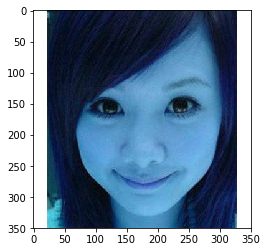

In [6]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.imshow(img)

In [7]:
from scipy.misc import imread
A = imread(my_file_list[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [8]:
files_train, file_test = train_test_split(my_file_list, test_size=0.10, random_state=42)

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 150, 150)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/home/ubuntu/workdir/ziff/train',  # this is the target directory
        target_size=(350, 350),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/home/ubuntu/workdir/ziff/valid',
        target_size=(350, 350),
        batch_size=batch_size,
        class_mode='binary')

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


InternalError: Failed to create session.

In [ ]:
from PIL import Image

In [ ]:
import keras
keras.__version__